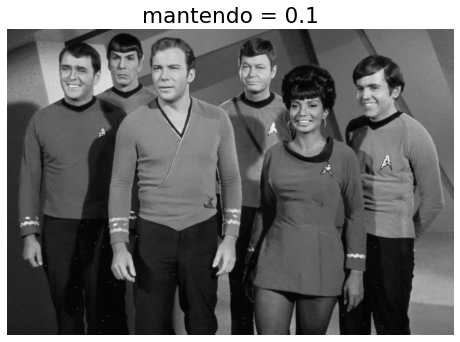

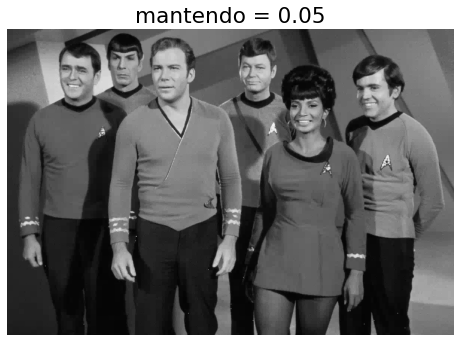

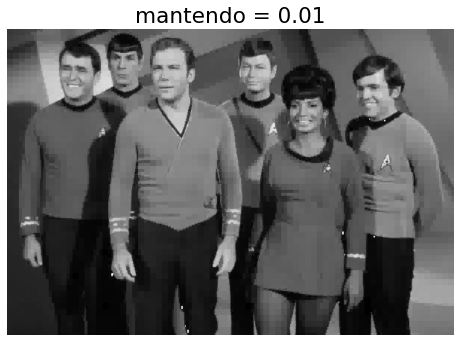

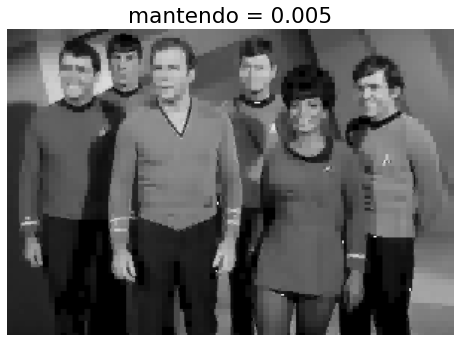

In [ ]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
import pywt
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

A = imread('tos.jpg')
B = np.mean(A, -1); 
n = 4
w = 'db1'
coeficientes = pywt.wavedec2(B,wavelet=w,level=n)

arrayCoeficientes, coeficientes_slices = pywt.coeffs_to_array(coeficientes)

Csort = np.sort(np.abs(arrayCoeficientes.reshape(-1)))

for keep in (0.1, 0.05, 0.01, 0.005):
    thresh = Csort[int(np.floor((1-keep)*len(Csort)))]
    ind = np.abs(arrayCoeficientes) > thresh
    Cfilt = arrayCoeficientes * ind 
    
    coeficientes_filt = pywt.array_to_coeffs(Cfilt,coeficientes_slices,output_format='wavedec2')
    
    Arecon = pywt.waverec2(coeficientes_filt,wavelet=w)
    plt.figure()
    plt.imshow(Arecon.astype('uint8'),cmap='gray')
    plt.axis('off')
    plt.title('mantendo = ' + str(keep))
